<a href="https://colab.research.google.com/github/NishadSoney/Project--122/blob/master/Project_122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K    550
S    550
O    550
G    550
Z    550
X    550
Y    550
M    550
R    550
U    550
C    550
B    550
D    550
T    550
E    550
H    550
N    550
L    550
Q    550
V    550
F    550
P    550
A    550
J    550
W    550
I    550
Name: labels, dtype: int64
14300
660
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255. 255.   0.
   0.   0.   0.   0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.992


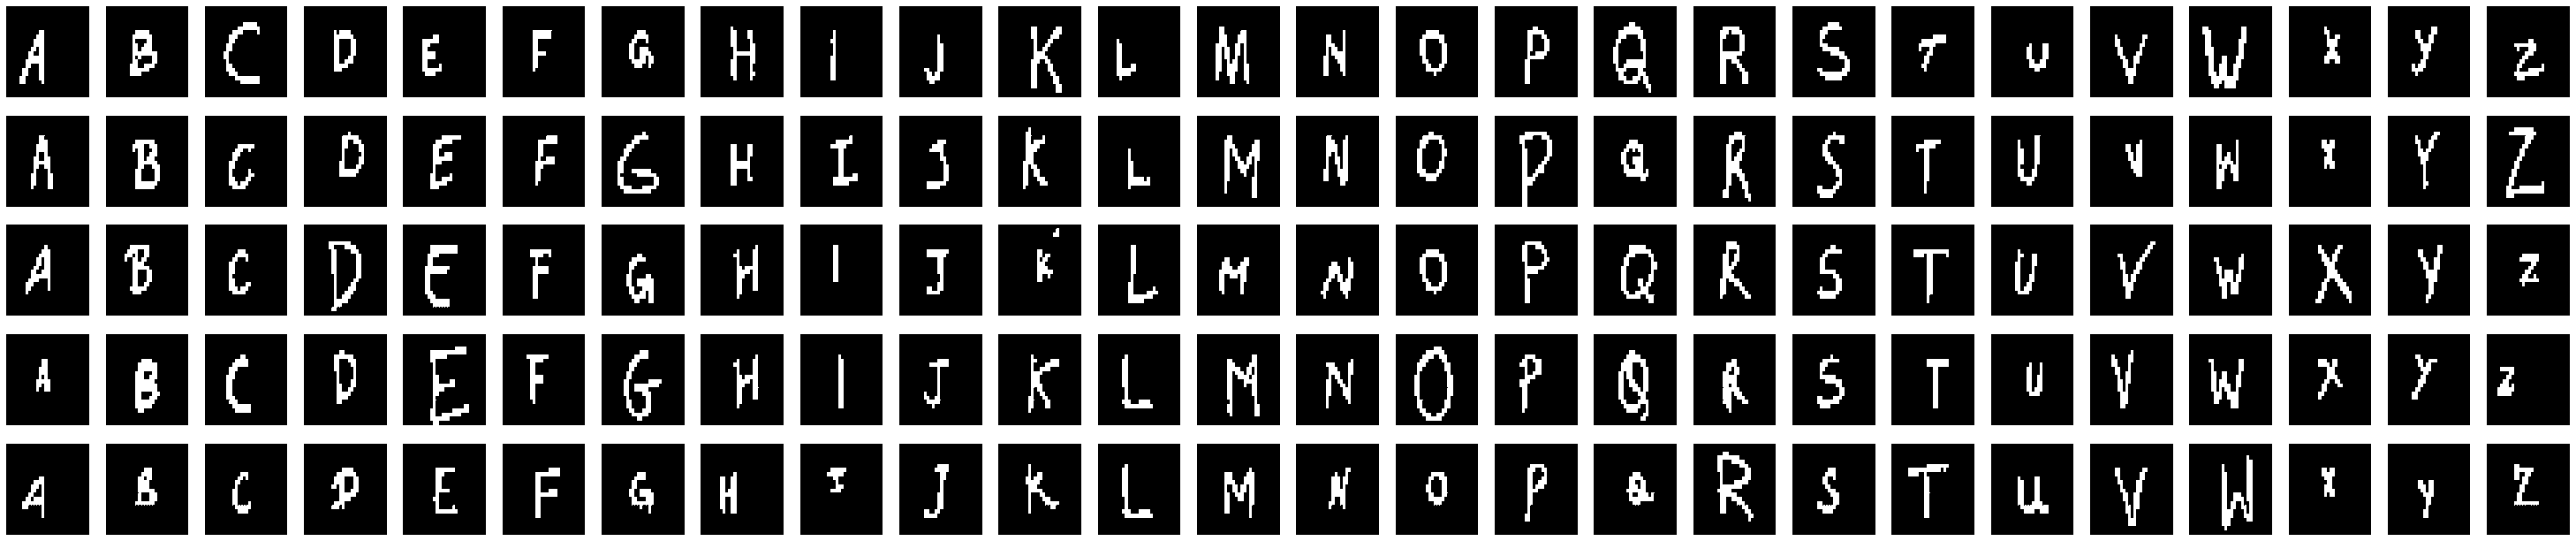

In [9]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x = np.load("image.npz")["arr_0"]
y = pd.read_csv("labels.csv")["labels"]
print(pd.Series(y).value_counts())
classes = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
nc = len(classes)

sample_per_class = 5
plt.figure(figsize = (nc*2,(1+sample_per_class*2)))
idx_cls = 0
for cls in classes:
  idxs = np.flatnonzero(y == cls)
  idxs = np.random.choice(idxs,sample_per_class,replace = False)
  i = 0
  for idx in idxs:
    plt_idx = i*nc+idx_cls+1
    p = plt.subplot(sample_per_class,nc,plt_idx)
    p = sns.heatmap(np.reshape(x[idx],(22,30)),cmap = plt.cm.gray,
                    xticklabels = False,yticklabels = False,cbar = False)
    p = plt.axis("off")
    i += 1
  idx_cls += 1
  print(len(x))
  print(len(x[0]))
  print(x[0])
  print(y[0])

  x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,train_size = 7500,test_size = 2500)
  x_train_scale = x_train/255
x_test_scale = x_test/255

clf = LogisticRegression(solver = "saga",multi_class = "multinomial").fit(x_train_scale,y_train)

y_pre = clf.predict(x_test_scale)
acc = accuracy_score(y_test,y_pre)

print(acc)